In [ ]:
pip freeze > requirements.txt


In [ ]:
!pip install resampy

In [ ]:
import os
import pandas as pd
import librosa

import numpy as np
from scipy.io import wavfile as wav
from sklearn.decomposition import PCA

def traverse_subfolders(subfolders):
    audio_files = []
    subfolder_names = []

    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        audio_files.extend(get_audio_files(subfolder))
        subfolder_names.extend([subfolder_name] * len(get_audio_files(subfolder)))

    return audio_files, subfolder_names

def get_audio_files(subfolder):
    audio_files = []

    for root, dirs, files in os.walk(subfolder):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))

    return audio_files

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

def process_audio_files(audio_files, subfolder_names, n_components):
    data = []

    for audio_file, subfolder_name in zip(audio_files, subfolder_names):
        compressed_data = features_extractor(audio_file)  # Extract MFCC features

        data.append([audio_file, compressed_data, subfolder_name])

    df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
    return df

# def process_audio_files(audio_files, subfolder_names, n_components):
#     data = []

#     for audio_file, subfolder_name in zip(audio_files, subfolder_names):
#         wave_sample_rate, wave_audio = wav.read(audio_file)  # Read audio file
#         compressed_data = compress_audio_pca(wave_audio, n_components)  # Apply PCA

#         data.append([audio_file, compressed_data, subfolder_name])

#     df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
#     return df

def compress_audio_pca(audio_data, n_components):
    # Reshape audio data to a 2D array
    audio_data_2d = audio_data.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=n_components)
    compressed_data_2d = pca.fit_transform(audio_data_2d)

    # Restore the compressed data to its original shape
    compressed_data = compressed_data_2d.reshape(-1)

    return compressed_data


subfolders_orig = ['//content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/original-data/donateacry_corpus_cleaned_and_updated_data/belly_pain',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/original-data/donateacry_corpus_cleaned_and_updated_data/burping',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/original-data/donateacry_corpus_cleaned_and_updated_data/discomfort',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/original-data/donateacry_corpus_cleaned_and_updated_data/hungry',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/original-data/donateacry_corpus_cleaned_and_updated_data/tired']

subfolders_aug_2 = ['/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial_plus_pitch/belly_pain',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial_plus_pitch/burping',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial_plus_pitch/discomfort',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial_plus_pitch/hungry',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial_plus_pitch/tired']

subfolders_aug_1 = ['/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data/belly_pain',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data/burping',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data/discomfort',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data/hungry',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data/tired']

subfolders_aug_3 = ['/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial/belly_pain',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial/burping',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial/discomfort',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial/hungry',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/augmented_data_partial/tired']
n_components = 1

audio_files, subfolder_names = traverse_subfolders(subfolders_aug_2)
df = process_audio_files(audio_files, subfolder_names, n_components)
print(df)

                                                   File  \
0     /content/drive/Shareddrives/Senior Project I/D...   
1     /content/drive/Shareddrives/Senior Project I/D...   
2     /content/drive/Shareddrives/Senior Project I/D...   
3     /content/drive/Shareddrives/Senior Project I/D...   
4     /content/drive/Shareddrives/Senior Project I/D...   
...                                                 ...   
1680  /content/drive/Shareddrives/Senior Project I/D...   
1681  /content/drive/Shareddrives/Senior Project I/D...   
1682  /content/drive/Shareddrives/Senior Project I/D...   
1683  /content/drive/Shareddrives/Senior Project I/D...   
1684  /content/drive/Shareddrives/Senior Project I/D...   

                                        Compressed Data Subfolder Name  
0     [-637.0497, 276.37564, -84.52838, -4.427984, 3...     belly_pain  
1     [-523.1781, 162.79086, -30.79041, -19.515139, ...     belly_pain  
2     [-522.52716, 162.4642, -29.250381, -17.655542,...     belly_pain  

In [ ]:
df = df.drop("File",axis=1)
df

,Compressed Data,Subfolder Name
0,"[-637.0497, 276.37564, -84.52838, -4.427984, 3...",belly_pain
1,"[-523.1781, 162.79086, -30.79041, -19.515139, ...",belly_pain
2,"[-522.52716, 162.4642, -29.250381, -17.655542,...",belly_pain
3,"[-617.98914, 250.813, -64.35278, -6.927463, 33...",belly_pain
4,"[-526.34344, 164.73973, -28.414618, -23.34822,...",belly_pain
...,...,...
1680,"[-362.78702, 166.82518, -93.24383, -18.504173,...",tired
1681,"[-312.17587, 187.45648, -107.11103, -21.428648...",tired
1682,"[-365.6414, 167.55258, -97.19814, -17.004797, ...",tired
1683,"[-317.4658, 185.82321, -99.90864, -26.404146, ...",tired


In [ ]:
for i in range(1685):

    df["shape"] = len(df["Compressed Data"][i])
df


,Compressed Data,Subfolder Name,shape
0,"[-637.0497, 276.37564, -84.52838, -4.427984, 3...",belly_pain,40
1,"[-523.1781, 162.79086, -30.79041, -19.515139, ...",belly_pain,40
2,"[-522.52716, 162.4642, -29.250381, -17.655542,...",belly_pain,40
3,"[-617.98914, 250.813, -64.35278, -6.927463, 33...",belly_pain,40
4,"[-526.34344, 164.73973, -28.414618, -23.34822,...",belly_pain,40
...,...,...,...
1680,"[-362.78702, 166.82518, -93.24383, -18.504173,...",tired,40
1681,"[-312.17587, 187.45648, -107.11103, -21.428648...",tired,40
1682,"[-365.6414, 167.55258, -97.19814, -17.004797, ...",tired,40
1683,"[-317.4658, 185.82321, -99.90864, -26.404146, ...",tired,40


In [ ]:
len(df["Compressed Data"][0])


40

In [ ]:
df.rename(columns={"Subfolder Name":"class"},inplace=True)
df.head()

,Compressed Data,class,shape
0,"[-637.0497, 276.37564, -84.52838, -4.427984, 3...",belly_pain,40
1,"[-523.1781, 162.79086, -30.79041, -19.515139, ...",belly_pain,40
2,"[-522.52716, 162.4642, -29.250381, -17.655542,...",belly_pain,40
3,"[-617.98914, 250.813, -64.35278, -6.927463, 33...",belly_pain,40
4,"[-526.34344, 164.73973, -28.414618, -23.34822,...",belly_pain,40


In [ ]:
#
train, test = np.split(df.sample(frac=1), [int(0.80*len(df))])


x = train["Compressed Data"]
y = train["class"]

x_test = test["Compressed Data"]
y_test = test["class"]

x.shape



(1348,)

[]

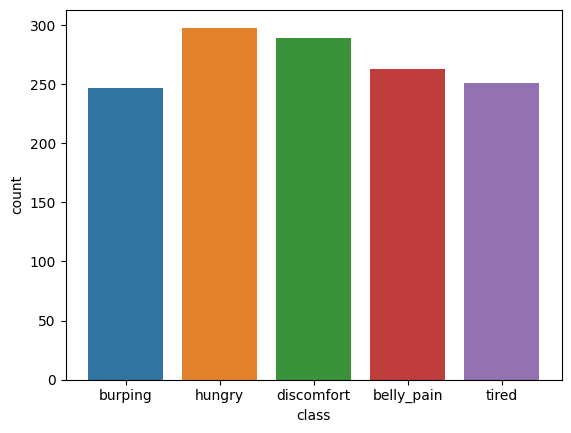

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="class",data=train)
plt.plot()

In [ ]:
from imblearn.over_sampling import RandomOverSampler


resamp = RandomOverSampler()
x = x.to_numpy()
x=x.reshape(-1,1)
x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)
x,y=resamp.fit_resample(x,y)
x_test,y_test=resamp.fit_resample(x_test,y_test)


[]

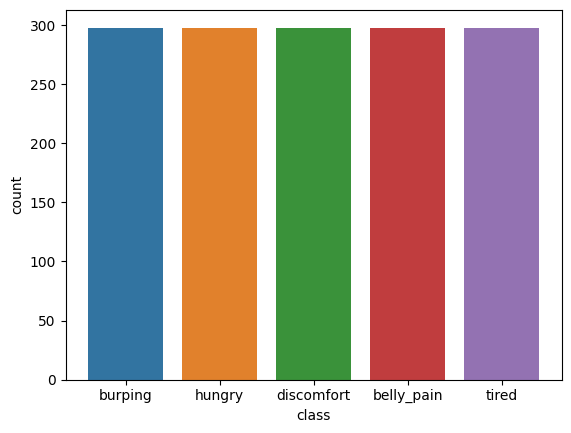

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y,data=train)
plt.plot()

In [ ]:
x.shape


(1490, 1)

In [ ]:
data = {'Data': x, 'class': y}


In [ ]:

train = pd.DataFrame(x,columns=["Data"])
train["class"]=y
print(train["class"].value_counts())

test = pd.DataFrame(x_test,columns=["Data"])
test["class"]=y_test
test["class"].value_counts()



burping       298
hungry        298
discomfort    298
belly_pain    298
tired         298
Name: class, dtype: int64


discomfort    84
belly_pain    84
burping       84
hungry        84
tired         84
Name: class, dtype: int64

for train data

In [ ]:
df_new = train["Data"].apply(pd.Series)
df_result = pd.concat([train, df_new], axis=1)
df_result = df_result.drop('Data', axis=1)
df_result.head()

,class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,burping,-391.761780,153.712097,-63.881771,-6.862335,30.802229,-22.452852,-10.079767,2.619288,-13.799198,...,2.648601,-1.946826,-0.668749,-0.095226,-2.535599,-1.416545,-1.528050,-2.916672,-0.979894,0.243384
1,hungry,-447.279327,114.341240,-31.250498,1.838682,11.700463,-30.999474,-7.197794,6.622939,-19.868307,...,1.696849,-0.538343,-1.597318,0.539697,1.254790,2.329929,3.481561,2.998636,3.416906,1.959687
2,hungry,-281.351135,170.214417,-65.585861,-14.877831,17.931515,-42.133102,-19.654953,6.507522,-13.419834,...,-0.512532,-1.693325,-3.351379,0.160139,-2.147228,-2.035213,2.287131,-1.244074,-4.077432,-1.232325
3,discomfort,-254.158142,183.892731,-75.355232,-44.293869,3.750584,-30.408943,-7.262609,5.495350,-18.494743,...,3.033061,2.145239,-1.763284,-0.180606,-0.395701,-1.959062,-1.469267,-1.269397,0.366976,0.493661
4,discomfort,-329.737274,160.119476,-37.595306,-21.392218,1.185377,-32.573349,-8.139114,10.515903,-11.194511,...,-1.733755,-4.644486,-4.712412,0.120772,1.401702,1.417898,3.214801,3.693960,3.195911,1.151047


In [ ]:
df_new_test = test["Data"].apply(pd.Series)
df_result_test = pd.concat([test, df_new_test], axis=1)
df_result_test = df_result_test.drop('Data', axis=1)
df_result_test

,class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,discomfort,-333.005890,166.505081,-71.921295,-14.162472,23.926231,-30.259974,-1.718613,14.700054,-18.656462,...,1.107559,-1.506726,-1.813060,3.618949,2.762724,1.529865,3.991136,2.316744,0.619923,1.030013
1,belly_pain,-265.260498,167.630997,-135.632965,-7.006803,42.232124,-51.080261,0.348843,24.620716,-33.667397,...,1.290358,-1.989839,-1.108808,0.189009,-3.458591,0.234791,2.143463,-1.304976,1.309676,2.245935
2,belly_pain,-448.719971,96.114426,18.032984,-11.557084,-9.835574,-13.259974,-15.519170,-13.072559,-14.639346,...,-2.342567,-2.531840,-1.641588,0.210900,2.447171,2.937436,1.680904,0.898411,0.543960,-0.152461
3,burping,-273.156464,209.336884,-123.338364,16.459932,73.934799,-52.111458,-32.592731,7.626513,-31.150042,...,13.132425,10.394738,-6.692138,-6.613762,0.744628,1.040748,-1.584822,-1.540789,3.869269,4.756807
4,discomfort,-346.734314,185.544739,-90.160484,3.215420,37.825191,-37.274334,2.828109,13.979919,-26.658293,...,3.182794,-1.924791,-1.679648,0.469896,-1.886498,0.650445,0.939144,-2.223951,0.140006,0.418497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,tired,-408.216370,150.431458,-54.479473,-12.662238,25.829641,-22.468271,-8.272681,11.564270,-15.875108,...,0.549272,0.571801,-2.272120,-0.449538,-0.069682,-1.462589,0.721674,0.447990,-1.499552,0.565690
416,tired,-360.103180,188.733734,-33.485329,-27.138227,7.845982,-22.585457,-11.608414,-2.407557,-24.999090,...,0.603824,1.098672,-1.552055,-0.126184,0.372703,-1.690648,0.201823,1.636101,0.093107,0.698604
417,tired,-504.268738,164.858017,7.361156,3.024657,14.617351,-24.393068,-25.456429,-9.204900,-19.116726,...,-2.534671,-2.787759,-3.728111,-1.810011,-0.307582,-1.560363,-0.287882,1.540320,0.084712,-0.492253
418,tired,-677.160767,185.692871,-11.571434,7.817189,36.166046,-5.442124,2.402019,12.441245,-9.898035,...,-4.733289,-2.028046,-4.341554,-3.300759,-1.640457,-4.726412,-4.369745,-2.620092,-4.182067,-2.959971


In [ ]:
from sklearn.model_selection import train_test_split

x = df_result.drop("class",axis=1)
y = df_result["class"]

x_test = df_result_test.drop("class",axis=1)
y_test = df_result_test["class"]

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)



decisionTreeClassifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import f1_score,accuracy_score
import sklearn

DT= DecisionTreeClassifier()
DT.fit(x,y)
pred=DT.predict(x_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test, pred))

0.7904761904761904
              precision    recall  f1-score   support

  belly_pain       0.74      0.85      0.79        84
     burping       0.86      0.86      0.86        84
  discomfort       0.81      0.82      0.82        84
      hungry       0.73      0.71      0.72        84
       tired       0.82      0.71      0.76        84

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.79      0.79      0.79       420



SVM model

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(x,y)
pred=svm_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test, pred))

0.48333333333333334
              precision    recall  f1-score   support

  belly_pain       0.40      0.70      0.51        84
     burping       0.54      0.39      0.46        84
  discomfort       0.71      0.40      0.52        84
      hungry       0.51      0.71      0.60        84
       tired       0.36      0.20      0.26        84

    accuracy                           0.48       420
   macro avg       0.51      0.48      0.47       420
weighted avg       0.51      0.48      0.47       420



KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x, y)
pred=knn_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test, pred))

0.969047619047619
              precision    recall  f1-score   support

  belly_pain       0.98      1.00      0.99        84
     burping       0.97      1.00      0.98        84
  discomfort       0.97      1.00      0.98        84
      hungry       1.00      0.85      0.92        84
       tired       0.94      1.00      0.97        84

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x, y)
pred=lg_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test, pred))

0.5952380952380952
              precision    recall  f1-score   support

  belly_pain       0.66      0.70      0.68        84
     burping       0.56      0.70      0.62        84
  discomfort       0.64      0.56      0.59        84
      hungry       0.63      0.63      0.63        84
       tired       0.48      0.38      0.42        84

    accuracy                           0.60       420
   macro avg       0.59      0.60      0.59       420
weighted avg       0.59      0.60      0.59       420



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive BAYES


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x, y)
pred=nb_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test, pred))

0.48095238095238096
              precision    recall  f1-score   support

  belly_pain       0.57      0.55      0.56        84
     burping       0.69      0.54      0.60        84
  discomfort       0.52      0.27      0.36        84
      hungry       0.37      0.76      0.49        84
       tired       0.44      0.29      0.35        84

    accuracy                           0.48       420
   macro avg       0.52      0.48      0.47       420
weighted avg       0.52      0.48      0.47       420



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rbc_model = RandomForestClassifier()
rbc_model = rbc_model.fit(x, y)
pred=rbc_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.classification_report(y_test, pred))

0.9785714285714285
              precision    recall  f1-score   support

  belly_pain       1.00      0.98      0.99        84
     burping       0.97      1.00      0.98        84
  discomfort       1.00      0.99      0.99        84
      hungry       0.95      0.96      0.96        84
       tired       0.98      0.96      0.97        84

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420



In [ ]:
tired="/content/blues.00000.wav"
# new_audio_features = features_extractor(belly)
new_audio_features = features_extractor(tired)
print(new_audio_features)
new_audio_features_2d = new_audio_features.reshape(1, -1)
# new_audio_features.shape
new_pre =pd.DataFrame(new_audio_features_2d)
pred=knn_model.predict(new_pre)
pred

<ipython-input-159-095e763fd972>:31: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

In [ ]:
subfolders_mendeley_data = ['/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/Mendeley data/Infants Cry Sound/Dataset/Hungry',
              '/content/drive/Shareddrives/Senior Project I/Dataset: Donate a baby cry corpus/Mendeley data/Infants Cry Sound/Dataset/Uncomfortable']

n_components = 1

audio_files_mendeley, subfolder_names_mendeley = traverse_subfolders(subfolders_mendeley_data)
df_mendeley = process_audio_files(audio_files_mendeley, subfolder_names_mendeley, n_components)
df_mendeley

,File,Compressed Data,Subfolder Name
0,/content/drive/Shareddrives/Senior Project I/D...,"[-117.29417, 68.67778, -72.69842, 14.866527, -...",Hungry
1,/content/drive/Shareddrives/Senior Project I/D...,"[-335.72028, 94.97857, -0.68630815, 23.364916,...",Hungry
2,/content/drive/Shareddrives/Senior Project I/D...,"[-142.20941, 55.70634, -70.759735, 6.0442443, ...",Hungry
3,/content/drive/Shareddrives/Senior Project I/D...,"[-118.86842, 48.360497, -69.610466, 9.135606, ...",Hungry
4,/content/drive/Shareddrives/Senior Project I/D...,"[-364.54623, 150.22665, -94.25114, -11.907959,...",Hungry
5,/content/drive/Shareddrives/Senior Project I/D...,"[-111.69158, 47.866985, -73.739075, 18.520815,...",Hungry
6,/content/drive/Shareddrives/Senior Project I/D...,"[-389.9774, 141.96715, -55.282158, -19.165392,...",Hungry
7,/content/drive/Shareddrives/Senior Project I/D...,"[-204.22473, 49.886593, -67.82409, 17.211536, ...",Hungry
8,/content/drive/Shareddrives/Senior Project I/D...,"[-358.9347, 140.54703, -59.36377, -33.242363, ...",Hungry
9,/content/drive/Shareddrives/Senior Project I/D...,"[-320.64114, 80.567, -27.284351, 13.063854, -1...",Hungry


In [ ]:
it = 0
success = 0
for audio in audio_files_mendeley:
  print(it)

  new_audio_features = features_extractor(audio)
  #print(new_audio_features)
  new_audio_features_2d = new_audio_features.reshape(1, -1)
  new_pre =pd.DataFrame(new_audio_features_2d)
  pred=knn_model.predict(new_pre)
  print(subfolder_names_mendeley[it])
  print(pred)

  if subfolder_names_mendeley[it].lower() == pred[0]:
    success += 1
  it +=1

print(success/27)

0
Hungry
['hungry']
1
Hungry
['hungry']
2
Hungry
['discomfort']
3
Hungry
['discomfort']
4
Hungry
['tired']
5
Hungry
['discomfort']
6
Hungry
['hungry']
7
Hungry
['hungry']
8
Hungry
['hungry']
9
Hungry
['hungry']
10
Hungry
['hungry']
11
Hungry
['hungry']
12
Hungry
['hungry']
13
Hungry
['tired']
14
Hungry
['discomfort']
15
Hungry
['hungry']
16
Hungry
['hungry']
17
Hungry
['hungry']
18
Hungry
['hungry']
19
Hungry
['hungry']
20
Hungry
['discomfort']
21
Hungry
['hungry']
22
Hungry
['hungry']
23
Hungry
['hungry']
24
Hungry
['hungry']
25
Hungry
['hungry']
26
Hungry
['hungry']
27
Hungry
['hungry']
28
Uncomfortable
['hungry']
29
Uncomfortable
['hungry']
30
Uncomfortable
['burping']
31
Uncomfortable
['burping']
32
Uncomfortable
['hungry']
33
Uncomfortable
['discomfort']
34
Uncomfortable
['hungry']
35
Uncomfortable
['discomfort']
36
Uncomfortable
['hungry']
37
Uncomfortable
['hungry']
38
Uncomfortable
['hungry']
39
Uncomfortable
['hungry']
40
Uncomfortable
['hungry']
41
Uncomfortable
['hungry']
42